In [2]:
import matplotlib.pyplot as plt
import json
import random
from scipy.integrate import simps

# set seed for reproducibility
random.seed(0)

In [3]:
import matplotlib.font_manager as font_manager
from matplotlib import rcParams
plt.style.use('./graphics/matteo.mplstyle')
for font in font_manager.findSystemFonts("./graphics"):
    font_manager.fontManager.addfont(font)
rcParams['font.family'] = 'Palatino'
rcParams['axes.unicode_minus'] = False

colors = ['#009473', '#F0C05A', '#7BC4C4', '#FF6F61']
# invert colors
# colors = [c for c in reversed(colors)]

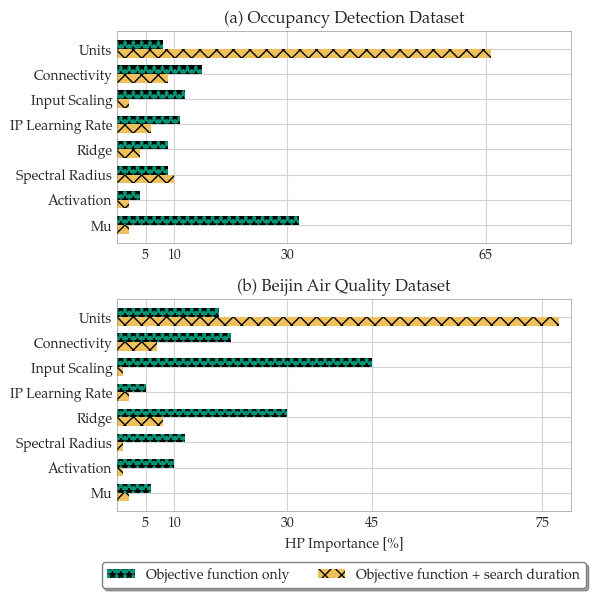

In [4]:
import matplotlib.pyplot as plt
import numpy as np

hatchs = [
    "**",
    "xx",
    "o",
    "-",
    "+",
    "O",
    "x",
    ".",
]

occupancy_hyperparameter_importances_no_duration = {
    "Mu": 0.32,
    "Connectivity": 0.15,
    "Input Scaling": 0.12,
    "IP Learning Rate": 0.11,
    "Ridge": 0.09,
    "Spectral Radius": 0.09,
    "Units": 0.08,
    "Activation": 0.04
}

occupancy_hyperparameter_importances_yes_duration = {
    "IP Learning Rate": 0.06,
    "Units": 0.66,
    "Spectral Radius": 0.10,
    "Connectivity": 0.09,
    "Ridge": 0.04,
    "Activation": 0.02,
    "Mu": 0.02,
    "Input Scaling": 0.02
}

air_quality_hyperparameter_importances_no_duration = {
    "Input Scaling": 0.45,
    "Units": 0.18,
    "Spectral Radius": 0.12,
    "Mu": 0.06,
    "IP Learning Rate": 0.05,
    "Activation": 0.10,
    "Connectivity": 0.20,
    "Ridge": 0.30
}

air_quality_hyperparameter_importances_yes_duration = {
    "IP Learning Rate": 0.02,
    "Units": 0.78,
    "Spectral Radius": 0.01,
    "Connectivity": 0.07,
    "Ridge": 0.08,
    "Activation": 0.01,
    "Mu": 0.02,
    "Input Scaling": 0.01
}

categories = ["Units", "Connectivity", "Input Scaling", "IP Learning Rate", "Ridge", "Spectral Radius", "Activation", "Mu"]
y_pos = np.arange(len(categories))


# order occupancy_hyperparameter_importances_no_duration according with categories
occupancy_hyperparameter_importances_no_duration = [occupancy_hyperparameter_importances_no_duration[category] for category in categories]
occupancy_hyperparameter_importances_yes_duration = [occupancy_hyperparameter_importances_yes_duration[category] for category in categories]
air_quality_hyperparameter_importances_no_duration = [air_quality_hyperparameter_importances_no_duration[category] for category in categories]
air_quality_hyperparameter_importances_yes_duration = [air_quality_hyperparameter_importances_yes_duration[category] for category in categories]

# multiply by 100
occupancy_hyperparameter_importances_no_duration = [100 * value for value in occupancy_hyperparameter_importances_no_duration]
occupancy_hyperparameter_importances_yes_duration = [100 * value for value in occupancy_hyperparameter_importances_yes_duration]
air_quality_hyperparameter_importances_no_duration = [100 * value for value in air_quality_hyperparameter_importances_no_duration]
air_quality_hyperparameter_importances_yes_duration = [100 * value for value in air_quality_hyperparameter_importances_yes_duration]

# Plot
bar_width = 0.35

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))
fig.subplots_adjust(hspace=0.5)

# Clustered bars
# ax1.barh(y_pos - bar_width / 2, air_quality_joules, bar_width, label="Beijin Air Quality Dataset", color=colors[0], xerr=air_quality_std, hatch=hatchs[0], alpha=0.99)
# ax1.barh(y_pos + bar_width / 2, occupancy_joules, bar_width, label="Occupancy Detection Dataset", color=colors[1], xerr=occupancy_std, hatch=hatchs[1], alpha=0.99)

ax1.barh(y_pos - bar_width / 2, occupancy_hyperparameter_importances_no_duration, bar_width, label="Objective function only", color=colors[0], hatch=hatchs[0], alpha=0.99)
ax1.barh(y_pos + bar_width / 2, occupancy_hyperparameter_importances_yes_duration, bar_width, label="Objective function + search duration", color=colors[1], hatch=hatchs[1], alpha=0.99)

# Labels and title
ax1.set_title('(a) Occupancy Detection Dataset')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(categories)
ax1.invert_yaxis()
# set x axis limts
ax1.set_xlim([0, 80])
# set x ticks
ax1.set_xticks([5, 10, 30, 65])

ax2.set_title('(b) Beijin Air Quality Dataset')
ax2.set_xlabel('HP Importance [%]')
ax2.barh(y_pos - bar_width / 2, air_quality_hyperparameter_importances_no_duration, bar_width, label="Objective function only", color=colors[0], hatch=hatchs[0], alpha=0.99)
ax2.barh(y_pos + bar_width / 2, air_quality_hyperparameter_importances_yes_duration, bar_width, label="Objective function + search duration", color=colors[1], hatch=hatchs[1], alpha=0.99)
ax2.set_yticks(y_pos)
ax2.set_yticklabels(categories)
ax2.invert_yaxis()
ax2.set_xlim([0, 80])
ax2.set_xticks([5, 10, 30, 45, 75])
ax2.legend(loc='center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=2, fontsize=10)

# Show plot
plt.tight_layout()
# plt.show()

plt.savefig("hp_importance.pdf", bbox_inches='tight')
